In [1]:
import pandas as pd
import numpy as np 
import re
import pickle
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from langdetect import detect
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\gaith\anaconda3\envs\pfe\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.set()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('nlp1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2525 non-null   int64 
 1   statut          2525 non-null   object
 2   type_poste      2525 non-null   object
 3   description     2518 non-null   object
 4   societe         2525 non-null   object
 5   ville           2525 non-null   object
 6   semaine         2525 non-null   object
 7   sous_categorie  2525 non-null   object
dtypes: int64(1), object(7)
memory usage: 157.9+ KB


In [5]:
df = df.drop('Unnamed: 0', axis=1)
df

,statut,type_poste,description,societe,ville,semaine,sous_categorie
0,Data Scientist IV,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,3ème semaine,Data
1,Data Analyst V,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,4ème semaine,Data
2,data entry operator,Temps plein,Education: Secondary (high) school graduation ...,B D Cannabis Store,Kitimat,4ème semaine,Data
3,Statistical Data Analyst,CDD,POSITION PURPOSEThis position is responsible f...,York Region,Sharon,4ème semaine,Data
4,Data Visualization Consultant,CDD,We are an organization comprised of industry t...,Canadian Institute for Health Information,Toronto,4ème semaine,Data
...,...,...,...,...,...,...,...
2520,Procurement Project Manager,Temps plein,Analyze purchasing portfoliosParticipate in th...,Aversan,Saint-Laurent,il y a un mois,manager financier
2521,Sr. Procurement Delivery Manager - Category Ma...,Temps plein,Sr. Procurement Manager - External WorkforceRo...,Roche,Mississauga,4ème semaine,manager financier
2522,procurement manager,Temps plein,"Education: College, CEGEP or other non-univers...",Mortise Construction Ltd.,Surrey,il y a un mois,manager financier
2523,purchasing manager,Temps plein,Education: Bachelor's degreeExperience: 2 year...,M Max Building Supply Ltd,Surrey,4ème semaine,manager financier


In [11]:
null_description_indices = df[df['description'].isnull()].index
null_description_indices
df.drop(null_description_indices, inplace=True)

In [6]:
def clean_text(raw):
    try:
        raw = raw.replace('\r', '')
        raw = raw.replace('\n', '')
        raw = raw.replace('?', '')
        raw = raw.replace('!', '')
        raw = raw.replace(')', '')
        raw = raw.replace('(', '')
        clean_text = re.sub(" +", " ", raw)
        clean_text = clean_text.strip()
        clean_text = re.sub(" , ", ", ", clean_text)
        clean_text = clean_text.replace('.,', '.')
    except:
        clean_text = np.nan
    return clean_text

df["description"] = df["description"].apply(clean_text)

In [7]:
df['lower_description'] = df['description'].str.lower()

## Tokenization

In [12]:
tokenizer = RegexpTokenizer(r"\w+")
df['word_tokenized'] = df.lower_description.apply(lambda row: tokenizer.tokenize(row))
df['sentence_tokenized'] = df.lower_description.apply(lambda row: sent_tokenize(row))


In [13]:
df['word_count'] = df.word_tokenized.str.len()
df['sentence_count'] = df.sentence_tokenized.str.len()


C:\Users\gaith\AppData\Local\Temp\ipykernel_10544\1610279609.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['word_count'])
C:\Users\gaith\AppData\Local\Temp\ipykernel_10544\1610279609.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sentence_count'])
findfont: Font family ['normal

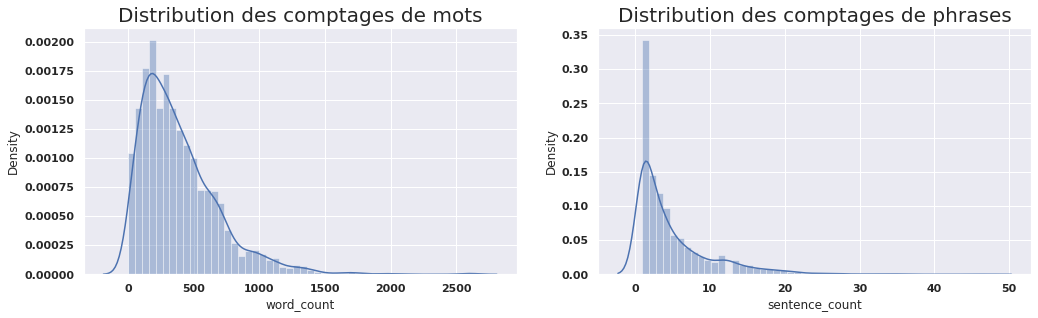

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['word_count'])
plt.title('Distribution des comptages de mots', size=20)
plt.subplot(1, 2, 2)
sns.distplot(df['sentence_count'])
plt.title('Distribution des comptages de phrases', size=20)
plt.tight_layout()  
plt.show()



In [9]:
df.describe()

,word_count,sentence_count
count,2417.000000,2417.000000
mean,391.532478,4.976003
std,302.907354,5.285813
min,2.000000,1.000000
25%,167.000000,1.000000
50%,320.000000,3.000000
75%,536.000000,7.000000
max,2621.000000,47.000000


In [15]:
indices_remove =  df.loc[df.word_count <= 11].index 
indices_remove = list(indices_remove)
df.drop(indices_remove, inplace = True)


In [16]:
stop_words_fr = set(stopwords.words('french'))
stop_words_en = set(stopwords.words('english'))
df['clean_words'] = df['word_tokenized'].apply(lambda x: [word for word in x if word not in stop_words_fr and word not in stop_words_en])

In [17]:
df

,statut,type_poste,description,societe,ville,semaine,sous_categorie,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words
0,Data Scientist IV,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,3ème semaine,Data,duration: longterm contractlocation: remotepay...,"[duration, longterm, contractlocation, remotep...",[duration: longterm contractlocation: remotepa...,281,3,"[duration, longterm, contractlocation, remotep..."
1,Data Analyst V,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,4ème semaine,Data,duration: longterm contractlocation: remotepay...,"[duration, longterm, contractlocation, remotep...",[duration: longterm contractlocation: remotepa...,340,6,"[duration, longterm, contractlocation, remotep..."
2,data entry operator,Temps plein,Education: Secondary high school graduation ce...,B D Cannabis Store,Kitimat,4ème semaine,Data,education: secondary high school graduation ce...,"[education, secondary, high, school, graduatio...",[education: secondary high school graduation c...,42,1,"[education, secondary, high, school, graduatio..."
3,Statistical Data Analyst,CDD,POSITION PURPOSEThis position is responsible f...,York Region,Sharon,4ème semaine,Data,position purposethis position is responsible f...,"[position, purposethis, position, is, responsi...",[position purposethis position is responsible ...,434,2,"[position, purposethis, position, responsible,..."
4,Data Visualization Consultant,CDD,We are an organization comprised of industry t...,Canadian Institute for Health Information,Toronto,4ème semaine,Data,we are an organization comprised of industry t...,"[we, are, an, organization, comprised, of, ind...",[we are an organization comprised of industry ...,1965,18,"[organization, comprised, industry, thought, l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,Procurement Project Manager,Temps plein,Analyze purchasing portfoliosParticipate in th...,Aversan,Saint-Laurent,il y a un mois,manager financier,analyze purchasing portfoliosparticipate in th...,"[analyze, purchasing, portfoliosparticipate, i...",[analyze purchasing portfoliosparticipate in t...,317,2,"[analyze, purchasing, portfoliosparticipate, p..."
2521,Sr. Procurement Delivery Manager - Category Ma...,Temps plein,Sr. Procurement Manager - External WorkforceRo...,Roche,Mississauga,4ème semaine,manager financier,sr. procurement manager - external workforcero...,"[sr, procurement, manager, external, workforce...",[sr. procurement manager - external workforcer...,1147,13,"[sr, procurement, manager, external, workforce..."
2522,procurement manager,Temps plein,"Education: College, CEGEP or other non-univers...",Mortise Construction Ltd.,Surrey,il y a un mois,manager financier,"education: college, cegep or other non-univers...","[education, college, cegep, or, other, non, un...","[education: college, cegep or other non-univer...",104,1,"[education, college, cegep, non, university, c..."
2523,purchasing manager,Temps plein,Education: Bachelor's degreeExperience: 2 year...,M Max Building Supply Ltd,Surrey,4ème semaine,manager financier,education: bachelor's degreeexperience: 2 year...,"[education, bachelor, s, degreeexperience, 2, ...",[education: bachelor's degreeexperience: 2 yea...,54,1,"[education, bachelor, degreeexperience, 2, yea..."


##  Lemmatization


In [18]:
def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

df['clean_lemmed'] = df.clean_words.apply(lemming)

In [19]:
df

,statut,type_poste,description,societe,ville,semaine,sous_categorie,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_lemmed
0,Data Scientist IV,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,3ème semaine,Data,duration: longterm contractlocation: remotepay...,"[duration, longterm, contractlocation, remotep...",[duration: longterm contractlocation: remotepa...,281,3,"[duration, longterm, contractlocation, remotep...","[duration, longterm, contractlocation, remotep..."
1,Data Analyst V,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,4ème semaine,Data,duration: longterm contractlocation: remotepay...,"[duration, longterm, contractlocation, remotep...",[duration: longterm contractlocation: remotepa...,340,6,"[duration, longterm, contractlocation, remotep...","[duration, longterm, contractlocation, remotep..."
2,data entry operator,Temps plein,Education: Secondary high school graduation ce...,B D Cannabis Store,Kitimat,4ème semaine,Data,education: secondary high school graduation ce...,"[education, secondary, high, school, graduatio...",[education: secondary high school graduation c...,42,1,"[education, secondary, high, school, graduatio...","[education, secondary, high, school, graduatio..."
3,Statistical Data Analyst,CDD,POSITION PURPOSEThis position is responsible f...,York Region,Sharon,4ème semaine,Data,position purposethis position is responsible f...,"[position, purposethis, position, is, responsi...",[position purposethis position is responsible ...,434,2,"[position, purposethis, position, responsible,...","[position, purposethis, position, responsible,..."
4,Data Visualization Consultant,CDD,We are an organization comprised of industry t...,Canadian Institute for Health Information,Toronto,4ème semaine,Data,we are an organization comprised of industry t...,"[we, are, an, organization, comprised, of, ind...",[we are an organization comprised of industry ...,1965,18,"[organization, comprised, industry, thought, l...","[organization, comprised, industry, thought, l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,Procurement Project Manager,Temps plein,Analyze purchasing portfoliosParticipate in th...,Aversan,Saint-Laurent,il y a un mois,manager financier,analyze purchasing portfoliosparticipate in th...,"[analyze, purchasing, portfoliosparticipate, i...",[analyze purchasing portfoliosparticipate in t...,317,2,"[analyze, purchasing, portfoliosparticipate, p...","[analyze, purchasing, portfoliosparticipate, p..."
2521,Sr. Procurement Delivery Manager - Category Ma...,Temps plein,Sr. Procurement Manager - External WorkforceRo...,Roche,Mississauga,4ème semaine,manager financier,sr. procurement manager - external workforcero...,"[sr, procurement, manager, external, workforce...",[sr. procurement manager - external workforcer...,1147,13,"[sr, procurement, manager, external, workforce...","[sr, procurement, manager, external, workforce..."
2522,procurement manager,Temps plein,"Education: College, CEGEP or other non-univers...",Mortise Construction Ltd.,Surrey,il y a un mois,manager financier,"education: college, cegep or other non-univers...","[education, college, cegep, or, other, non, un...","[education: college, cegep or other non-univer...",104,1,"[education, college, cegep, non, university, c...","[education, college, cegep, non, university, c..."
2523,purchasing manager,Temps plein,Education: Bachelor's degreeExperience: 2 year...,M Max Building Supply Ltd,Surrey,4ème semaine,manager financier,education: bachelor's degreeexperience: 2 year...,"[education, bachelor, s, degreeexperience, 2, ...",[education: bachelor's degreeexperience: 2 yea...,54,1,"[education, bachelor, degreeexperience, 2, yea...","[education, bachelor, degreeexperience, 2, yea..."


In [20]:
df["description_joined"] = df["clean_lemmed"].apply(lambda mots: " ".join(mots))
df

,statut,type_poste,description,societe,ville,semaine,sous_categorie,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_lemmed,description_joined
0,Data Scientist IV,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,3ème semaine,Data,duration: longterm contractlocation: remotepay...,"[duration, longterm, contractlocation, remotep...",[duration: longterm contractlocation: remotepa...,281,3,"[duration, longterm, contractlocation, remotep...","[duration, longterm, contractlocation, remotep...",duration longterm contractlocation remotepay r...
1,Data Analyst V,CDD,Duration: Longterm ContractLocation: RemotePay...,"Intelliswift Software, Inc.",Montréal,4ème semaine,Data,duration: longterm contractlocation: remotepay...,"[duration, longterm, contractlocation, remotep...",[duration: longterm contractlocation: remotepa...,340,6,"[duration, longterm, contractlocation, remotep...","[duration, longterm, contractlocation, remotep...",duration longterm contractlocation remotepay r...
2,data entry operator,Temps plein,Education: Secondary high school graduation ce...,B D Cannabis Store,Kitimat,4ème semaine,Data,education: secondary high school graduation ce...,"[education, secondary, high, school, graduatio...",[education: secondary high school graduation c...,42,1,"[education, secondary, high, school, graduatio...","[education, secondary, high, school, graduatio...",education secondary high school graduation cer...
3,Statistical Data Analyst,CDD,POSITION PURPOSEThis position is responsible f...,York Region,Sharon,4ème semaine,Data,position purposethis position is responsible f...,"[position, purposethis, position, is, responsi...",[position purposethis position is responsible ...,434,2,"[position, purposethis, position, responsible,...","[position, purposethis, position, responsible,...",position purposethis position responsible extr...
4,Data Visualization Consultant,CDD,We are an organization comprised of industry t...,Canadian Institute for Health Information,Toronto,4ème semaine,Data,we are an organization comprised of industry t...,"[we, are, an, organization, comprised, of, ind...",[we are an organization comprised of industry ...,1965,18,"[organization, comprised, industry, thought, l...","[organization, comprised, industry, thought, l...",organization comprised industry thought leader...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,Procurement Project Manager,Temps plein,Analyze purchasing portfoliosParticipate in th...,Aversan,Saint-Laurent,il y a un mois,manager financier,analyze purchasing portfoliosparticipate in th...,"[analyze, purchasing, portfoliosparticipate, i...",[analyze purchasing portfoliosparticipate in t...,317,2,"[analyze, purchasing, portfoliosparticipate, p...","[analyze, purchasing, portfoliosparticipate, p...",analyze purchasing portfoliosparticipate prepa...
2521,Sr. Procurement Delivery Manager - Category Ma...,Temps plein,Sr. Procurement Manager - External WorkforceRo...,Roche,Mississauga,4ème semaine,manager financier,sr. procurement manager - external workforcero...,"[sr, procurement, manager, external, workforce...",[sr. procurement manager - external workforcer...,1147,13,"[sr, procurement, manager, external, workforce...","[sr, procurement, manager, external, workforce...",sr procurement manager external workforceroche...
2522,procurement manager,Temps plein,"Education: College, CEGEP or other non-univers...",Mortise Construction Ltd.,Surrey,il y a un mois,manager financier,"education: college, cegep or other non-univers...","[education, college, cegep, or, other, non, un...","[education: college, cegep or other non-univer...",104,1,"[education, college, cegep, non, university, c...","[education, college, cegep, non, university, c...",education college cegep non university certifi...
2523,purchasing manager,Temps plein,Education: Bachelor's degreeExperience: 2 year...,M Max Building Supply Ltd,

In [21]:
descriptions = df["description_joined"].tolist()
vectorizer = TfidfVectorizer()
matrice_tfidf = vectorizer.fit_transform(descriptions)
nombre_affichages = 5 
mots_cles_utilisateur = input("Entrez les mots-clés: ")
vecteur_mots_cles = vectorizer.transform([mots_cles_utilisateur])
similarites = cosine_similarity(matrice_tfidf, vecteur_mots_cles)
indices_tries = similarites.flatten().argsort()[::-1]
indices_offres_choisies = indices_tries[:nombre_affichages]
offres_choisies = df.iloc[indices_offres_choisies]
offres_choisies 

Entrez les mots-clés: power bi


,statut,type_poste,description,societe,ville,semaine,sous_categorie,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_lemmed,description_joined
13,Data Analyst - Sales Enablement,Temps plein,Assist the Sales group in improving their skil...,Intelcom,Montréal,4ème semaine,Data,assist the sales group in improving their skil...,"[assist, the, sales, group, in, improving, the...",[assist the sales group in improving their ski...,193,2,"[assist, sales, group, improving, skills, data...","[assist, sale, group, improving, skill, data, ...",assist sale group improving skill data underst...
324,"Data Scientist, Digital Business Intelligence ...",Temps plein,"Perks you can look forward to:Identifying, cle...",CBC/Radio-Canada,Montréal,4ème semaine,Data,"perks you can look forward to:identifying, cle...","[perks, you, can, look, forward, to, identifyi...","[perks you can look forward to:identifying, cl...",419,2,"[perks, look, forward, identifying, cleaning, ...","[perk, look, forward, identifying, cleaning, t...",perk look forward identifying cleaning transfo...
2049,Analyste - Intelligence d'affaires (BI),Permanent,"Salaire :Échelle salariale entre 26,66$ et 45,...",Centre de services scolaire des Hautes-Rivières,Saint-Jean-sur-Richelieu,4ème semaine,Analyste financier,"salaire :échelle salariale entre 26,66$ et 45,...","[salaire, échelle, salariale, entre, 26, 66, e...","[salaire :échelle salariale entre 26,66$ et 45...",521,1,"[salaire, échelle, salariale, entre, 26, 66, 4...","[salaire, échelle, salariale, entre, 26, 66, 4...",salaire échelle salariale entre 26 66 45 79 he...
2070,Analyste fonctionnel,Permanent,Collaborer avec l'équipe de médecine pour sout...,McGill University,Montréal,3ème semaine,Analyste financier,collaborer avec l'équipe de médecine pour sout...,"[collaborer, avec, l, équipe, de, médecine, po...",[collaborer avec l'équipe de médecine pour sou...,369,2,"[collaborer, équipe, médecine, soutenir, activ...","[collaborer, équipe, médecine, soutenir, activ...",collaborer équipe médecine soutenir activités ...
29,"Specialist, Data and Analytics",Temps plein,DescriptionQualificationsAnalyze business obje...,Air Canada,Dorval,il y a un mois,Data,descriptionqualificationsanalyze business obje...,"[descriptionqualificationsanalyze, business, o...",[descriptionqualificationsanalyze business obj...,496,4,"[descriptionqualificationsanalyze, business, o...","[descriptionqualificationsanalyze, business, o...",descriptionqualificationsanalyze business obje...


## Job Keyword extraction 

In [166]:
lem_corpus = []
for row in df[df['sous_categorie'] == 'Infirmier']['clean_words']:
    lem_corpus += row


In [167]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["mots_cle", "frequence"]

In [122]:
row_indices_to_select = [46, 47,41,51,54]
selected_df = selected_df.iloc[row_indices_to_select]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


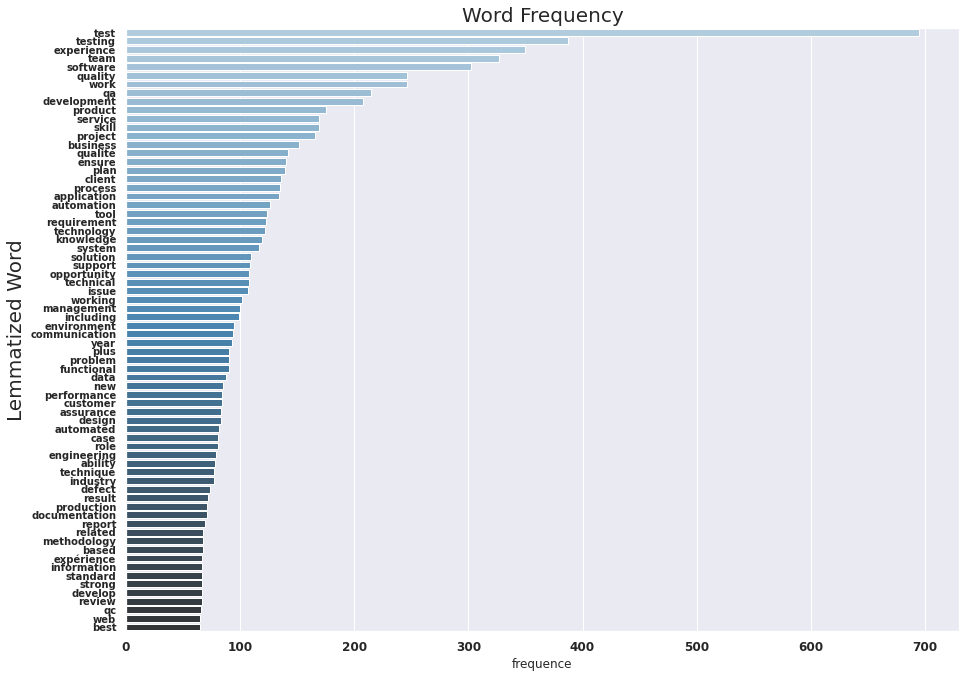

In [20]:
import textwrap

plt.figure(figsize=(14, 10)) 

lem_bar = sns.barplot(y="mots_cle", x="frequence", data=top_df[:70], palette="Blues_d", orient='h')

# Envelopper les mots sur l'axe y avec des espaces
wrapped_labels = [textwrap.fill(label, 20) for label in top_df['mots_cle'][:70]]
lem_bar.set_yticklabels(wrapped_labels, fontsize=10)

plt.title('Word Frequency', size=20)
plt.ylabel('Lemmatized Word', size=20)
plt.xticks(size=12)

plt.tight_layout()
plt.savefig('freqWords_bar.png', dpi=400)


In [15]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=1000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [40]:
ngram_corpus = df[df['sous_categorie'] == 'Mécanicien']['clean_lemmed'].str.join(' ')


In [41]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["mots_cle", "frequence"]


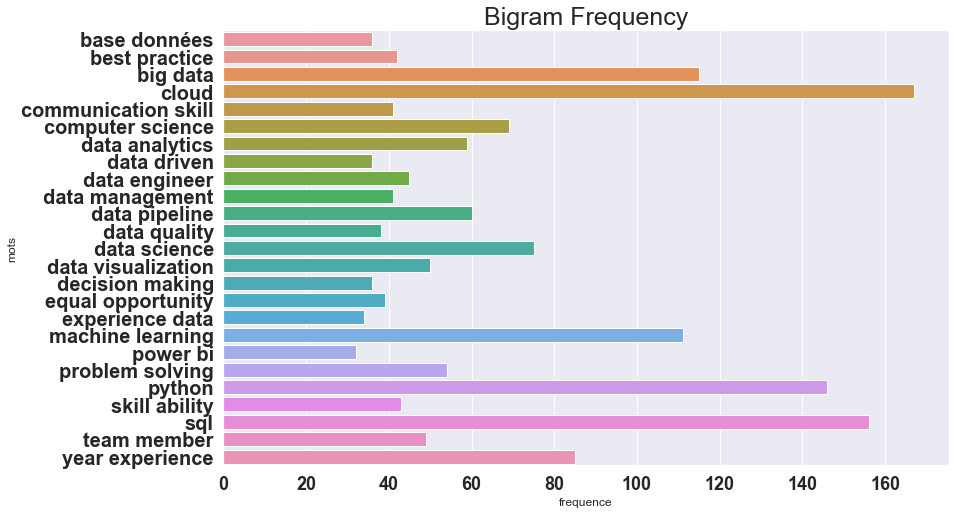

In [20]:
sns.set(rc={'figure.figsize':(13,8)})
bbar = sns.barplot(y ="mots" , x ="frequence", orient = 'h', data = df3)
plt.title('Bigram Frequency', size=25)
plt.xticks(size = 18)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 20);
plt.savefig('bigram_bar.png', dpi=200)


In [52]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [60]:
top3_words = get_top_n3_words(ngram_corpus, n = len(ngram_corpus))
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]

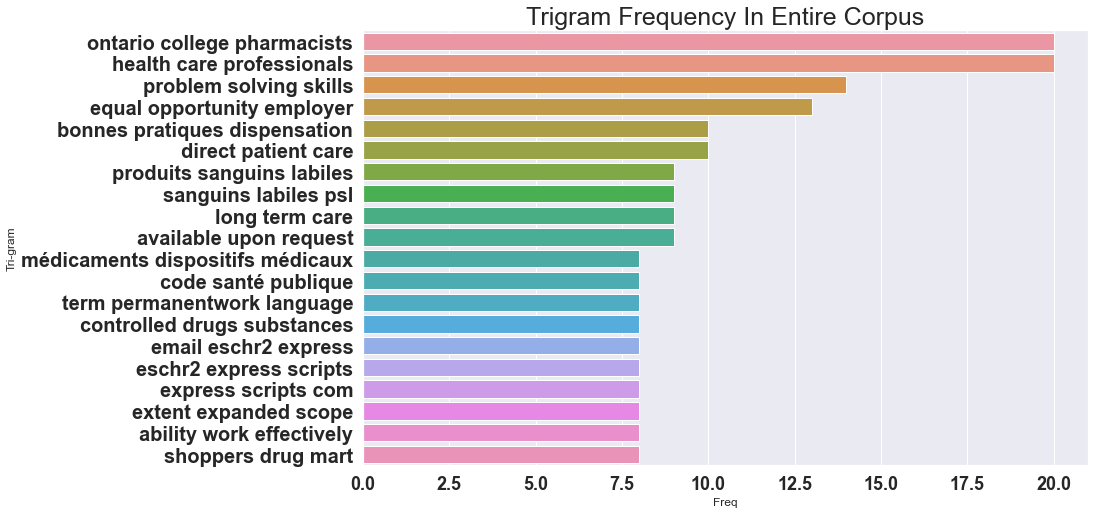

In [61]:
#Barplot of most freq Tri-grams
plt.tight_layout()
sns.set(rc={'figure.figsize':(13,8)})
tbar = sns.barplot(y = "Tri-gram", x = "Freq", orient = 'h', data = top3_df[:20])
plt.title('Trigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
tbar.set_yticklabels(tbar.get_yticklabels(), fontsize = 20);
plt.savefig('trigram_bar.png', dpi=200)

In [3]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd 
conn = psycopg2.connect(
    host="localhost",
    port=5432,
    database="offre_emploi",
    user="postgres",
    password="ousama"
)

engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)
cur = conn.cursor()

#concatenated_df1.to_sql('mot_cles', con=engine, if_exists='append', index=False)